In [1]:
from matplotlib import style
import matplotlib.pyplot as plt
import warnings
from collections import Counter
import numpy as np

style.use("fivethirtyeight")

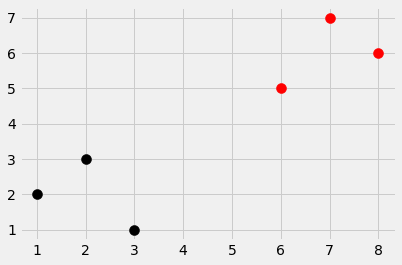

In [2]:
dataset = {"k": [[1,2], [2,3], [3,1]], 
           "r":[[6,5], [7,7], [8,6]] 
          }
new_features = [5,7]
for i in dataset:
    for j in dataset[i]:
        plt.scatter(j[0], j[1], s=100, color=i)

In [41]:
def KNN(data, predict, k=3):
    if len(data) >= k:
        warnings.warn("K is too low, try to take a bigger value for K")
    distances = []
    
    for group in data:
        for features in data[group]:
            #euclidean_distance = np.sqrt(np.sum((np.array(features) - np.array(predict))**2))
            euclidean_distance = np.linalg.norm(np.array(features) - np.array(predict))
            distances.append([euclidean_distance, group])
    
    votes = [i[1] for i in sorted(distances)[:k]]
    vote_result = Counter(votes).most_common(1)[0][0]
    confidence = (Counter(votes).most_common(1)[0][1] / k)
    return vote_result, confidence

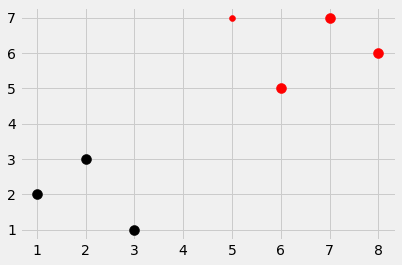

In [43]:
result, confidence = KNN(dataset, new_features, k=3)
result
for i in dataset:
    for j in dataset[i]:
        plt.scatter(j[0], j[1], s=100, color=i)
plt.scatter(new_features[0], new_features[1], color=result)

In [74]:
##########     Breast cancer data used with our KNN algorithm       ####
import pandas as pd
import random

df = pd.read_csv("../datasets/breast-cancer-wisconsin.data")
df.replace("?", -99999, inplace=True)
df.drop(["id"], 1, inplace=True)
full_data = df.astype(float).values.tolist()

random.shuffle(full_data)
test_size = 0.2
train_set = {2:[], 4:[]}
test_set = {2:[], 4:[]}
train_data = full_data[:-int(test_size * len(full_data))]
test_data = full_data[-int(test_size * len(full_data)):]

for i in train_data:
    train_set[i[-1]].append(i[:-1])

for i in test_data:
    test_set[i[-1]].append(i[:-1])

correct = 0
total = 0
for group in test_set:
    for data in test_set[group]:
        vote, confidence = KNN(train_set, data, k=5)
        if group == vote:
            correct += 1
        else:
            print(confidence)
        total += 1
print("Accuracy => ", correct/total)

0.8
0.6
1.0
0.6
Accuracy =>  0.9712230215827338
